In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Fetch the data
response = requests.get("https://data.calgary.ca/resource/c2es-76ed.json")  # API endpoint
data = response.json()

In [23]:
# Convert the data to a panda DataFrame
df = pd.DataFrame(data)

In [24]:
# Display the first few rows of the DataFrame
df.head()

,permitnum,statuscurrent,applieddate,issueddate,completeddate,permittype,permittypemapped,permitclass,permitclassgroup,permitclassmapped,...,point,:@computed_region_4b54_tmc4,:@computed_region_4a3i_ccfj,:@computed_region_kxmf_bzkv,:@computed_region_p8tp_5dkv,:@computed_region_qeuu_piif,:@computed_region_xxr9_iwz2,contractorname,applicantname,totalsqft
0,BP2004-10862,Completed,2004-08-13T00:00:00.000,2004-08-13T00:00:00.000,2004-11-05T00:00:00.000,Residential Improvement Project,Building,1301 - Private Detached Garage,Garage,Residential,...,"{'type': 'Point', 'coordinates': [-114.0683806...",2,2,192,4,10,4,NaN,NaN,NaN
1,BP2002-06744,Completed,2002-05-24T00:00:00.000,2002-06-05T00:00:00.000,2002-09-05T00:00:00.000,Demolition,Demolition,1106 - House,Single Family,Residential,...,"{'type': 'Point', 'coordinates': [-114.0988593...",8,1,200,2,303,8,YORK SHAW BUILDING MOVERS,NaN,NaN
2,BP2000-10380,Completed,2000-09-25T00:00:00.000,2000-09-25T00:00:00.000,2000-10-23T00:00:00.000,Residential Improvement Project,Building,1301 - Private Detached Garage,Garage,Residential,...,"{'type': 'Point', 'coordinates': [-114.0713430...",7,2,266,7,189,7,NaN,NaN,NaN
3,BP1999-08633,Completed,1999-07-21T00:00:00.000,1999-07-21T00:00:00.000,1999-10-15T00:00:00.000,Residential Improvement Project,Building,1301 - Private Detached Garage,Garage,Residential,...,"{'type': 'Point', 'coordinates': [-114.0783404...",7,2,219,7,34,7,NaN,NaN,NaN
4,BP2021-05528,Completed,2021-04-07T00:00:00.000,2021-04-08T00:00:00.000,2021-04-16T00:00:00.000,Demolition,Demolition,1106 - House,Single Family,Residential,...,"{'type': 'Point', 'coordinates': [-114.1084638...",8,1,200,2,303,8,CNJ DEVELOPMENTS,CNJ DEVELOPMENTS,NaN


In [25]:
# Get concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   permitnum                    1000 non-null   object
 1   statuscurrent                1000 non-null   object
 2   applieddate                  1000 non-null   object
 3   issueddate                   806 non-null    object
 4   completeddate                954 non-null    object
 5   permittype                   1000 non-null   object
 6   permittypemapped             1000 non-null   object
 7   permitclass                  1000 non-null   object
 8   permitclassgroup             1000 non-null   object
 9   permitclassmapped            1000 non-null   object
 10  workclass                    1000 non-null   object
 11  workclassgroup               1000 non-null   object
 12  workclassmapped              947 non-null    object
 13  description                  674 n

In [26]:
# Get descriptive statistics for numerical columns
df.describe()

,permitnum,statuscurrent,applieddate,issueddate,completeddate,permittype,permittypemapped,permitclass,permitclassgroup,permitclassmapped,...,point,:@computed_region_4b54_tmc4,:@computed_region_4a3i_ccfj,:@computed_region_kxmf_bzkv,:@computed_region_p8tp_5dkv,:@computed_region_qeuu_piif,:@computed_region_xxr9_iwz2,contractorname,applicantname,totalsqft
count,1000,1000,1000,806,954,1000,1000,1000,1000,1000,...,999,857,857,857,857,857,857,327,529,65
unique,1000,13,902,748,856,4,2,108,14,3,...,817,14,4,203,14,201,14,216,412,16
top,BP2004-10862,Completed,2023-09-14T00:00:00.000,2003-06-06T00:00:00.000,2000-04-24T00:00:00.000,Commercial / Multi Family Project,Building,1301 - Private Detached Garage,Commercial,Residential,...,"{'type': 'Point', 'coordinates': [0, 0]}",7,1,262,7,130,7,MCCANN'S BUILDING MOVERS,COUGAR CONTRACTORS,0
freq,1,748,4,3,4,454,818,184,280,585,...,142,164,320,72,176,72,202,7,8,49


In [27]:
# Check for missing values
df.isnull().sum()

permitnum                        0
statuscurrent                    0
applieddate                      0
issueddate                     194
completeddate                   46
permittype                       0
permittypemapped                 0
permitclass                      0
permitclassgroup                 0
permitclassmapped                0
workclass                        0
workclassgroup                   0
workclassmapped                 53
description                    326
housingunits                     0
estprojectcost                 343
originaladdress                142
communitycode                    0
communityname                    0
latitude                         1
longitude                        1
locationcount                  143
locationtypes                  143
locationaddresses              143
locationswkt                   143
locationsgeojson               143
point                            1
:@computed_region_4b54_tmc4    143
:@computed_region_4a

**Handling missing values**

- Drop columns like completeddate if they are not crucial to analysis and have a high proportion of missing values.
- For description or housingunits, if they are important, investigate why data might be missing and consider imputing values or flagging them.
- For columns with a single missing value, such as latitude and longitude, if possible, look up these values.
- For contractorname and applicantname with a significant number of missing values, consider whether these fields are essential for analysis or if they can be excluded.

Use pandas to handle missing values...
Each strategy has trade-offs, and the choice depends on specific use case and the importance of maintaining the integrity of the dataset for analysis. Always document the choices made regarding handling missing values for transparency and reproducibility

In [28]:
# Drop columns with a high percentage of missing values
df.drop(['completeddate'], axis=1, inplace=True)

# Convert 'estprojectcost' to numeric, coercing errors to NaN (not a number)
# The errors='coerce' parameter will replace all non-numeric values in the column with NaN
# which mean() can handle by default, ignoring NaN values
df['estprojectcost'] = pd.to_numeric(df['estprojectcost'], errors='coerce')
# Impute numerical missing values with the median
df['estprojectcost'].fillna(df['estprojectcost'].median(), inplace=True)

# Impute categorical missing values with the mode
df['description'].fillna(df['description'].mode()[0], inplace=True)

# Drop rows where 'latitude' or 'longitude' are missing
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Example: Convert a date column from string to datetime object
# df['your_date_column'] = pd.to_datetime(df['your_date_column'])

# Example: Fill missing values, if appropriate
# df['your_column'].fillna('Some Value', inplace=True)

# Example: Convert columns to the appropriate data types
# df['your_numerical_column'] = pd.to_numeric(df['your_numerical_column'])

1. How would you handle missing or incomplete data?

Handling missing or incomplete data is context-dependent and requires careful consideration of why the data is missing and how it impacts the analysis. My approach typically starts with a thorough exploratory data analysis to determine the extent and nature of the missing data. Based on the findings, I may employ several strategies:

If the missing data is minimal and random, I might choose to ignore those cases or use deletion methods for the affected rows or columns.
For numerical data with more significant missing values, I would consider imputation using the mean, median, or a predictive model if I believe the missingness isn't introducing bias.
With categorical data, I could impute using the mode or a more sophisticated method like predictive modeling.
If the data is missing systematically, it's crucial to delve into the reasons why it might be missing and consider using model-based imputation methods or data augmentation techniques.
When appropriate, I also employ flagging to indicate the presence of missing data, which can be particularly insightful for certain models or analyses.

2. Can you demonstrate how to merge this dataset with another one?

Merging datasets is a common task in data analysis. I would use a common key that is present in both datasets, such as a permit number or another unique identifier. For instance, in Python using pandas, I might use the merge function:

merge_df = df1.merge(df2, on = 'common_key', how = 'left')

NOTE: assuming 'df1' is our main dataset and 'df2' is the dataset we want to merge it with

The how parameter can be adjusted depending on the desired type of join—'left' for including all records from the first dataset, 'inner' for only matching records, and so on. The key is ensuring that the merging key is clean and consistent across both datasets. Additionally, I'd validate the merge by checking for duplicates and ensuring that no data is unexpectedly lost or misrepresented.

3. Provide an example of how you might use this data to inform a business decision.

This data can provide valuable insights into the construction and development landscape of a city. For a real estate development firm, for instance, analyzing the types of permits issued over time could indicate market trends, such as a shift towards commercial versus residential construction. By examining the estimated project costs and permit statuses, a business can gauge the current economic climate and competition in the market. For example:

If there's an uptick in permits for residential units, this might signal a growing market demand, suggesting an opportunity to invest in residential projects.
The time from application to issue date could indicate the efficiency of the permit process and potentially highlight the best times to submit applications.
By analyzing the location data of issued permits, a company can identify hotspots for development and plan their investments accordingly.
The key is to align the dataset analysis with strategic business questions and use the insights to drive evidence-based decisions.

**Data Analysis**

Goal is to dive deeper into the dataset to identify patterns, trends, and correlations, and insights that can inform decisions or hypotheses...

1. Grouping Data and Calculation Means

Grouping the data by category allows us to understand how different categories compare in terms of a numerical measure

For instance, we want to know the average porject costs by permit type

In [29]:
# average project costs by permit type
group_mean = df.groupby('permittype')['estprojectcost'].mean()
print(group_mean)

permittype
Commercial / Multi Family Project    721878.471211
Demolition                            25000.000000
Residential Improvement Project       17725.255017
Single Construction Permit            55043.283906
Name: estprojectcost, dtype: float64


This would reveal if certain types of permits, like commerical versus residential, typically have higher porject costs...

2. Identifying Commmon Categories

Using 'value_counts()' help identify the most frequently occuring categories within a dataset, which can highlight areas of high activity or interest

In [30]:
# find out which types of development project are most common
common_categories = df['permittype'].value_counts()
print(common_categories)

permittype
Commercial / Multi Family Project    454
Residential Improvement Project      299
Demolition                           182
Single Construction Permit            64
Name: count, dtype: int64


This information might indicate market trends, like a rise in renovations versus new constructions

3. Plotting Distribution of Numerical Data

Visualizaing the distribution of numerical data can uncover the spread, central tendency, and outliers within a numerical field

<Axes: >

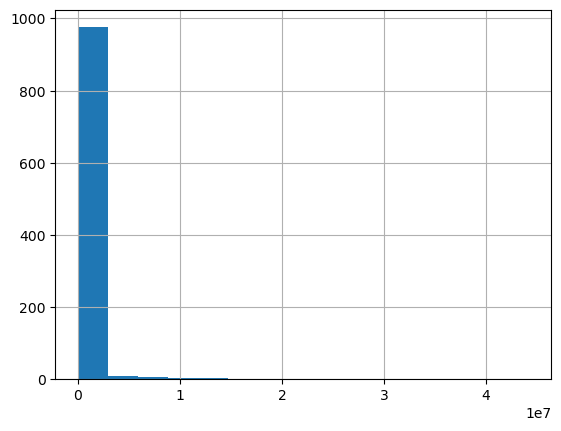

In [34]:
# want to see the distribution of estimated project costs:
df['estprojectcost'].hist(bins = 15)

Histogram should show if there's a standard range for project costs, and how many projects fall outside that range

4. Correlation Analysis

To understand the relationship between two numerical variables, might use a scatter plot or calculate the correlation coefficient

**Data Visualization**

Powerful tool to communicate insights and make sense of data. Particularly useful for identifying trends, anomalies, comparisons, and patterns in data. Can create different types of visualization in Python using matplotlib and seaborn

Numerical data refers to data that is expressible in terms of numbers rather than natural language descriptions. This type of data can be measured and ordered in a way that is meaningful. Numerical data can be further classified into two subtypes:

1. Discrete Data: This type involves countable values. Discrete data can only take certain values (like the number of students in a class).

2. Continuous Data: This data type involves measurements and can take on any value within a range (like height, weight, temperature, etc.).

Categorical data, on the other hand, represents characteristics that can be categorized into different groups or non-overlapping regions. These categories can be names or labels. Categorical data is qualitative and not inherently numerical, though it can be counted. Categorical data is also subdivided into two types:

1. Nominal Data: This is data where the order of the categories is not important (like gender, race, or hair color).

2. Ordinal Data: Here, the categories have a logical order, but the differences between the categories are not necessarily equal (like rankings, where you can say first place is higher than second, but you can't quantify by how much).

When visualizing data, the type of data you have can influence the type of chart or plot you might use. For example, a bar chart might be used for categorical data to show the frequency of each category, while a scatter plot or line graph could be used for numerical data to show relationships or trends over a continuous range.

1. Bar Plot

Useful for comparing different groups or tracking changes over time. 

<function matplotlib.pyplot.show(close=None, block=None)>

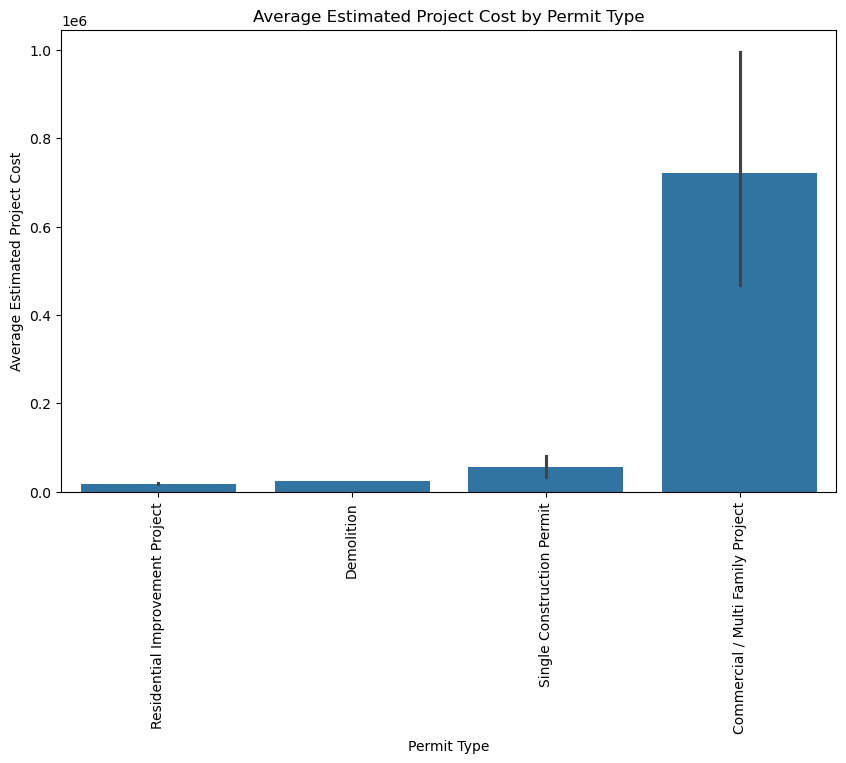

In [41]:
# example of a bar plot that might show average estimated project cost by permit type
plt.figure(figsize = (10, 6)) # Set the figure size
sns.barplot(x = 'permittype', y = 'estprojectcost', data = df)
plt.xticks(rotation = 90) # Rotate x labels for better readability
plt.xlabel('Permit Type') # Set x-axis label
plt.ylabel('Average Estimated Project Cost') # Set y-axis label
plt.title('Average Estimated Project Cost by Permit Type') # Set title
plt.show

2. Scatter Plot

Scatter plots are great for visualizating the relationship between two numerical variables.

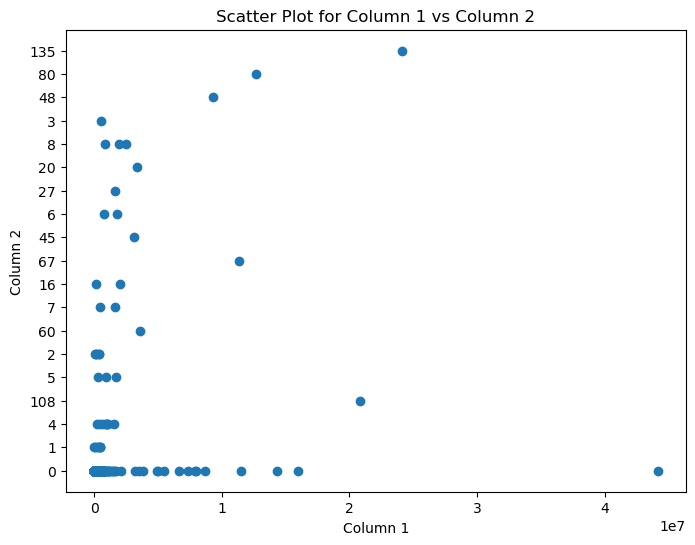

In [50]:
# not really any numerical variables, but this is the set up for scatter plot
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df['estprojectcost'], df['housingunits'])
plt.xlabel('Column 1') # Set x-axis label
plt.ylabel('Column 2') # Set y-axis label
plt.title('Scatter Plot for Column 1 vs Column 2') # Set title
plt.show()

3. Histogram

Histogram help understand the distribution of numerical data

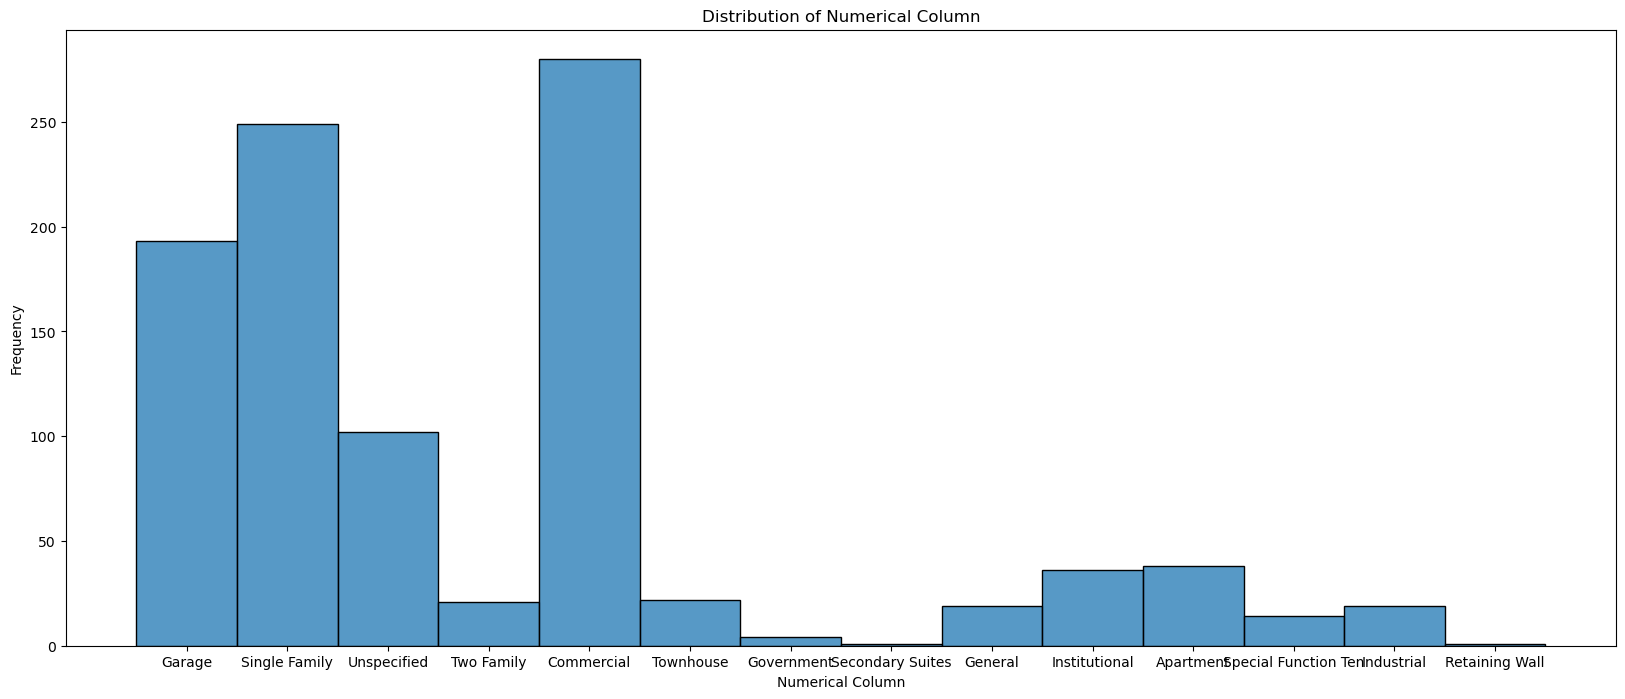

In [56]:
plt.figure(figsize=(20, 8)) # Set the figure size
sns.histplot(df['permitclassgroup'], kde=False, bins=20)
plt.xlabel('Numerical Column') # Set x-axis label
plt.ylabel('Frequency') # Set y-axis label
plt.title('Distribution of Numerical Column') # Set title
plt.show()

4. Boxplot

Used to show the distribution of quantitative data and to spot outliers

In [ ]:
plt.figure(figsize=(10, 6)) # Set the figure size
sns.boxplot(x='categorical_column', y='numerical_column', data=df)
plt.xticks(rotation=45) # Rotate x labels for better readability
plt.xlabel('Categorical Column') # Set x-axis label
plt.ylabel('Numerical Column') # Set y-axis label
plt.title('Box Plot of Numerical Column by Categorical Column') # Set title
plt.show()

Minimum, 25th percentile (Q1), median (50th percentile_), 75th percentile (Q3), and the maximum, is a crucial set of descriptive statistics for understanding the disctibution of a numerical variable.

Boxplots are visualization of these 5 numbers, There are two types of box plots. One type is box plot without outlier.

For cateogrical variable, mode is important